# **Data Wrangling Project 2024**
---

In fulfillment of the course *Data Wrangling XB_0014* at the *Vrije Universiteit Amsterdam*.<br>
This project was conducted by **Alvaro Pratama Maharto, Michael Evan Sutanto, Mahmoud Ashtar, and Miguel Sadorra.**

#### **TOPIC**: Marketing Strategy Effectivity
This research will be taking a look at the effects of different types of marketing campaigns and their effectivity in terms of clickthrough rate, customer engagement, and customer acquisition.
We will be having a look at the dataset with the following question in mind:
### **RESEARCH QUESTION**:
*How do different marketing strategies, particularly those used in bulk campaigns, impact the overall effectiveness of marketing initiatives, considering metrics such as clickthrough rates, customer engagement, and customer acquisition?*

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
campaigns_df = pd.read_csv("campaigns.csv")
messages_df = pd.read_csv("messages-demo.csv")

messages_df.head()

C:\Users\Migs\AppData\Local\Temp\ipykernel_2560\1183315834.py:2: DtypeWarning: Columns (7,8,16,17,19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  messages_df = pd.read_csv("messages-demo.csv")


,id,message_id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,date,sent_at,is_opened,opened_first_time_at,opened_last_time_at,is_clicked,clicked_first_time_at,clicked_last_time_at,is_unsubscribed,unsubscribed_at,is_hard_bounced,hard_bounced_at,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
0,3527358,3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,NaN,NaN,mail.ru,desktop,2021-04-30,2021-04-30 11:27:43,t,2021-05-04 05:47:05,2021-05-04 05:47:05,t,2021-05-04 05:47:46,2021-05-04 05:47:46,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,2021-05-06 16:40:38,2023-04-27 08:55:05.883908,2023-04-27 08:57:33.080129
1,3527619,0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,NaN,NaN,yandex.ru,desktop,2021-04-30,2021-04-30 08:00:35,t,2021-05-04 15:38:20,2021-05-04 15:38:20,f,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.265821,2023-04-27 08:56:18.60223
2,3527980,276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,NaN,NaN,mail.ru,desktop,2021-04-30,2021-04-30 05:56:37,t,2021-05-04 15:16:32,2021-05-04 15:16:32,f,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.777039,2023-04-27 08:56:19.112546
3,3528369,4545aff2-09b3-45e3-9abd-c680357e5429,32,transactional,1515915625489101550,email,NaN,NaN,mail.ru,desktop,2021-04-30,2021-04-30 05:53:59,t,2021-05-04 09:47:25,2021-05-04 09:47:25,f,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.325906,2023-04-27 08:56:19.590637
4,3528648,5850858d-2dcf-4f31-a0d3-5db5649b17c4,32,transactional,1515915625490455948,email,NaN,NaN,mail.ru,desktop,2021-04-30,2021-04-30 06:20:37,t,2021-05-04 18:56:16,2021-05-04 18:56:16,f,NaN,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.727792,2023-04-27 08:56:19.926474


In [38]:
print(len(messages_df))
print(len(campaigns_df))

10000000
1907


### Sampling
Since the data is about 10 million rows big, the group decided to use only a sample of 40% of the data to cut down on computing time.

In [39]:
messages_df = messages_df[messages_df["message_type"] == "bulk"] # since bulk are over 93% of the campains we are only working with bulk messages and bulk campaings
campaigns_df = campaigns_df[campaigns_df["campaign_type"] == "bulk"]

messages_sample = messages_df.sample(frac= 0.40, random_state= 42, replace= False)

In [40]:
messages_sample.head()
print(len(messages_sample))

2824958


### Cleaning up the data
We will eliminate all of the unneccessary columns from the dataframes we created above and consolidate them into one `merged_df`

In [41]:
print("Messages Database:\n",list(messages_df.columns),"\n")
print("Campaigns Database:\n",list(campaigns_df.columns))

# our sample has many columns >>> some are disposable and some are missing the majority of the values => these will be dropped

messages_sample = messages_sample.drop(["id", "category", "platform", "stream", "hard_bounced_at", "soft_bounced_at",
                                         "is_soft_bounced", "is_hard_bounced",  "blocked_at", "updated_at", "is_complained",
                                         "complained_at", "opened_first_time_at", "clicked_last_time_at", "unsubscribed_at", 
                                         "created_at", "message_type", "message_id", "date", "email_provider",
                                         "opened_last_time_at", "clicked_first_time_at"],
                                           axis= 1)

campaigns_df = campaigns_df.drop(["ab_test", "warmup_mode", "hour_limit", "is_test", "position", "campaign_type"], axis=1)



Messages Database:
 ['id', 'message_id', 'campaign_id', 'message_type', 'client_id', 'channel', 'category', 'platform', 'email_provider', 'stream', 'date', 'sent_at', 'is_opened', 'opened_first_time_at', 'opened_last_time_at', 'is_clicked', 'clicked_first_time_at', 'clicked_last_time_at', 'is_unsubscribed', 'unsubscribed_at', 'is_hard_bounced', 'hard_bounced_at', 'is_soft_bounced', 'soft_bounced_at', 'is_complained', 'complained_at', 'is_blocked', 'blocked_at', 'is_purchased', 'purchased_at', 'created_at', 'updated_at'] 

Campaigns Database:
 ['id', 'campaign_type', 'channel', 'topic', 'started_at', 'finished_at', 'total_count', 'ab_test', 'warmup_mode', 'hour_limit', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'is_test', 'position']


In [42]:
display(messages_sample[:10])

,campaign_id,client_id,channel,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased,purchased_at
7286261,230,1515915625488886720,email,2021-05-27 08:12:44,f,f,f,f,f,NaN
848463,64,1515915625608891382,mobile_push,2021-04-30 08:32:01,f,f,f,f,f,NaN
5778692,150,1515915625486927106,email,2021-05-21 08:58:57,f,f,f,f,f,NaN
7539782,230,1515915625488084724,email,2021-05-27 10:32:50,t,f,f,f,f,NaN
6710082,152,1515915625490799486,email,2021-05-24 08:41:10,f,f,f,f,f,NaN
827892,64,1515915625571018047,mobile_push,2021-04-30 07:58:37,f,f,f,f,f,NaN
7945106,257,1515915625490421081,mobile_push,2021-05-28 13:00:24,f,f,f,f,f,NaN
7965469,257,1515915625501578324,mobile_push,2021-05-28 13:00:33,f,f,f,f,f,NaN
6111520,150,1515915625500830959,email,2021-05-21 07:17:51,t,f,f,f,f,NaN
9701465,366,1515915625500834555,email,2021-06-10 08:30:54,f,f,f,f,f,NaN


In [43]:
display(campaigns_df[:10])

,id,channel,topic,started_at,finished_at,total_count,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,63,mobile_push,sale out,2021-04-30 07:22:36.615023,2021-04-30 07:23:41,48211.0,146.0,False,False,True,False,False,False
1,64,mobile_push,sale out,2021-04-30 09:02:50.817227,2021-04-30 09:04:08,1037337.0,97.0,False,False,True,False,False,False
2,78,mobile_push,sale out,2021-05-06 07:14:10.533318,2021-05-06 07:15:17,70080.0,146.0,False,False,True,False,False,False
3,79,mobile_push,sale out,2021-05-06 09:03:56.486750,2021-05-06 09:42:15,921838.0,97.0,False,False,True,False,False,False
4,89,mobile_push,NaN,2021-05-07 11:54:06.168664,2021-05-07 11:54:38,45503.0,109.0,False,True,True,False,False,False
5,110,mobile_push,sale out,2021-05-12 07:38:32.980268,2021-05-12 07:40:16,90816.0,146.0,False,False,True,False,False,False
6,111,mobile_push,sale out,2021-05-12 07:44:41.865082,2021-05-12 08:16:07,1045217.0,97.0,False,False,True,False,False,False
7,129,email,sale out,2021-05-18 07:38:49.825780,2021-05-18 07:38:58,3.0,133.0,False,False,True,False,False,False
8,136,email,sale out,2021-05-19 07:00:11.121170,2021-05-19 08:03:19,177363.0,133.0,False,False,True,False,False,False
9,138,mobile_push,sale out,2021-05-19 07:00:11.105536,2021-05-19 07:21:42,37889.0,146.0,False,False,True,False,False,False


In [44]:
merged_df = pd.merge(messages_sample, campaigns_df, left_on = "campaign_id", right_on= "id" ,how= "inner")
print(merged_df.isna().sum())

campaign_id                           0
client_id                             0
channel_x                             0
sent_at                               0
is_opened                             0
is_clicked                            0
is_unsubscribed                       0
is_blocked                            0
is_purchased                          0
purchased_at                    2823930
id                                    0
channel_y                             0
topic                             28757
started_at                            0
finished_at                           0
total_count                           0
subject_length                        0
subject_with_personalization          0
subject_with_deadline                 0
subject_with_emoji                    0
subject_with_bonuses                  0
subject_with_discount                 0
subject_with_saleout                  0
dtype: int64


In [45]:
print(merged_df['topic'].value_counts())
# I WOULD SAY ['TOPIC'] is a pretty irrelevant column (TO_DROP())

bool_channel = (merged_df['channel_x'] == merged_df['channel_y'])
print(bool_channel.value_counts())
# channel_x and channel_y are identical


bool_id = (merged_df['campaign_id'] == merged_df['id'])
print(bool_id.value_counts())
# campaign_id and id are identical


sale out    2789750
event          6451
Name: topic, dtype: int64
True    2824958
dtype: int64
True    2824958
dtype: int64


### Converting string and bool values to binary
Since the database contains a lot of string values to represent True or False, we will convert these values to binary to have an easier time understanding the database and using it to analyze the data.

In [46]:
def convert_to_binary(value):
    value_lower = str(value).lower()
    if value_lower == 't':
        return 1
    elif value_lower == 'f':
        return 0
    else:
        return value

merged_df = merged_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
merged_df = merged_df.applymap(convert_to_binary)


In [47]:
pd.set_option('display.max_columns', None)
display(merged_df[:10]) 

,campaign_id,client_id,channel_x,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased,purchased_at,id,channel_y,topic,started_at,finished_at,total_count,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,230,1515915625488886720,email,2021-05-27 08:12:44,0,0,0,0,0,NaN,230,email,sale out,2021-05-27 08:00:10.980791,2021-05-27 10:35:06,651859.0,115.0,0,0,1,0,0,0
1,230,1515915625488084724,email,2021-05-27 10:32:50,1,0,0,0,0,NaN,230,email,sale out,2021-05-27 08:00:10.980791,2021-05-27 10:35:06,651859.0,115.0,0,0,1,0,0,0
2,230,1515915625501096510,email,2021-05-27 09:19:47,0,0,0,0,0,NaN,230,email,sale out,2021-05-27 08:00:10.980791,2021-05-27 10:35:06,651859.0,115.0,0,0,1,0,0,0
3,230,1515915625502848292,email,2021-05-27 08:16:56,0,0,1,0,0,NaN,230,email,sale out,2021-05-27 08:00:10.980791,2021-05-27 10:35:06,651859.0,115.0,0,0,1,0,0,0
4,230,1515915625487737557,email,2021-05-27 09:44:49,0,0,0,0,0,NaN,230,email,sale out,2021-05-27 08:00:10.980791,2021-05-27 10:35:06,651859.0,115.0,0,0,1,0,0,0
5,230,1515915625488545980,email,2021-05-27 10:02:39,0,0,0,0,0,NaN,230,email,sale out,2021-05-27 08:00:10.980791,2021-05-27 10:35:06,651859.0,115.0,0,0,1,0,0,0
6,230,1515915625488327822,email,2021-05-27 09:57:28,0,0,0,0,0,NaN,230,email,sale out,2021-05-27 08:00:10.980791,2021-05-27 10:35:06,651859.0,115.0,0,0,1,0,0,0
7,230,1515915625489229184,email,2021-05-27 09:41:51,0,0,0,0,0,NaN,230,email,sale out,2021-05-27 08:00:10.980791,2021-05-27 10:35:06,651859.0,115.0,0,0,1,0,0,0
8,230,1515915625500283542,email,2021-05-27 10:11:37,0,0,0,0,0,NaN,230,email,sale out,2021-05-27 08:00:10.980791,2021-05-27 10:35:06,651859.0,115.0,0,0,1,0,0,0
9,230,1515915625487439364,email,2021-05-27 08:05:55,0,0,0,0,0,NaN,230,email,sale out,2021-05-27 08:00:10.980791,2021-05-27 10:35:06,651859.0,115.0,0,0,1,0,0,0


In [48]:
merged_df['channel_x'].value_counts()

mobile_push    1690477
email          1134481
Name: channel_x, dtype: int64

Need to check whether each type of `subject_type` affects `is_opened` and `is_purchased`

### Analyzing the Data
The group will now be analyzing the data in this section. We will be looking at important characteristics of the marketing campaign subjects and its effectiveness with regard to clickthrough rate which campaigns result in client purchase.

In [49]:
pd.pivot_table(merged_df, 
                values='is_purchased', 
                index=['subject_with_emoji', 'subject_with_personalization'], 
                aggfunc='count')

is_purchased
subject_with_emoji subject_with_personalization              
1                  0                                  2822501
                   1                                     2457

In [50]:
# can remove since every row has an emoji
emoji = merged_df.groupby("subject_with_emoji")['is_purchased'].value_counts()

# can remove since none have bonuses lol
bonuses = merged_df.groupby("subject_with_bonuses")['is_purchased'].value_counts()
display(bonuses)
display(emoji)

subject_with_bonuses  is_purchased
0                     0               2823930
                      1                  1028
Name: is_purchased, dtype: int64

subject_with_emoji  is_purchased
1                   0               2823930
                    1                  1028
Name: is_purchased, dtype: int64

### Marketing effect on Purchases
We will look at the effectiveness of advertising **<u>subject customization</u>** on sales.

In [51]:
personalization = merged_df.groupby('subject_with_personalization')['is_purchased'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_purchased'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_purchased'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_purchased'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_purchased', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [52]:
display(final_result)

personalization       deadline      discount        saleout      
                           0     1        0    1        0     1        0     1
is_purchased                                                                  
0                    2821476  1025  2782147  826  2811739  1025  2731167  1017
1                       2454     3    41783  202    12191     3    92763    11

After getting the correct dataframe with the effects of subject customization, we will then look at the improvement on sales per customization type (e.g. message personalization, messages with deadlines, message with discounts, message with saleouts).

In [53]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_purchased              0         1
                                     
personalization 0  0.999131  0.000869
                1  0.997082  0.002918
deadline        0  0.985204  0.014796
                1  0.803502  0.196498
discount        0  0.995683  0.004317
                1  0.997082  0.002918
saleout         0  0.967151  0.032849
                1  0.989300  0.010700

<strong>Marketing results on Sales</strong>

,Difference,Percent Increase
Personalization,0.002049,235.820736
Deadline,0.181702,1228.044303
Discount,-0.001399,-32.400616
Saleout,-0.022149,-67.425428


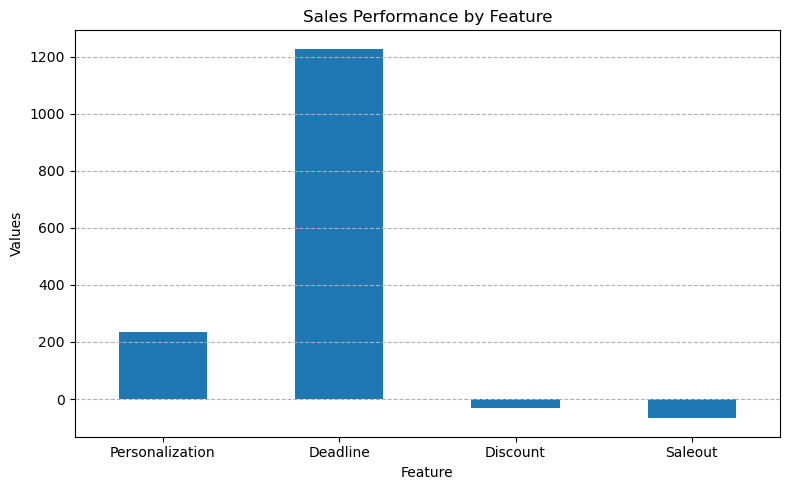

In [54]:
def getdiff(diff_df, feature):
    diff_1 = diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
    percentage_inc = (diff_1 / diff_df[1][(feature, 0)]) * 100
    return diff_1, percentage_inc
    
personalization_diff, personalization_percent_inc = getdiff(diff, 'personalization')
deadline_diff, deadline_percent_inc = getdiff(diff, 'deadline')
discount_diff, discount_percent_inc = getdiff(diff, 'discount')
saleout_diff, saleout_percent_inc = getdiff(diff, 'saleout')

sales_performance = pd.DataFrame({'Difference': [personalization_diff, deadline_diff, discount_diff, saleout_diff], 
                                  'Percent Increase': [personalization_percent_inc,deadline_percent_inc, discount_percent_inc, saleout_percent_inc]}, 
                                  index = ['Personalization', 'Deadline', 'Discount', 'Saleout'])

display(sales_performance)

sales_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Sales Performance by Feature')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Marketing Performance on Clickthrough Rate


In [55]:
personalization = merged_df.groupby('subject_with_personalization')['is_clicked'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_clicked'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_clicked'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_clicked'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_clicked', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [56]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_clicked                0         1
                                     
personalization 0  0.999165  0.000835
                1  0.996348  0.003652
deadline        0  0.985534  0.014466
                1  0.953079  0.046921
discount        0  0.995718  0.004282
                1  0.992871  0.007129
saleout         0  0.967038  0.032962
                1  0.976931  0.023069

In [57]:
def getdiff(diff_df, feature):
    diff_1 = diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
    percentage_inc = (diff_1 / diff_df[1][(feature, 0)]) * 100
    return diff_1, percentage_inc
    
personalization_diff, personalization_percent_inc = getdiff(diff, 'personalization')
deadline_diff, deadline_percent_inc = getdiff(diff, 'deadline')
discount_diff, discount_percent_inc = getdiff(diff, 'discount')
saleout_diff, saleout_percent_inc = getdiff(diff, 'saleout')

sales_performance = pd.DataFrame({'Difference': [personalization_diff, deadline_diff, discount_diff, saleout_diff], 
                                  'Percent Increase': [personalization_percent_inc,deadline_percent_inc, discount_percent_inc, saleout_percent_inc]}, 
                                  index = ['Personalization', 'Deadline', 'Discount', 'Saleout'])
display(sales_performance)

,Difference,Percent Increase
Personalization,0.002816,337.140407
Deadline,0.032455,224.357402
Discount,0.002848,66.507030
Saleout,-0.009893,-30.012290


### Marketing Performance on Customer Engagement

In [58]:
personalization = merged_df.groupby('subject_with_personalization')['is_unsubscribed'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_unsubscribed'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_unsubscribed'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_unsubscribed'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_unsubscribed', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [59]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_unsubscribed           0         1
                                     
personalization 0  0.999094  0.000906
                1  0.999966  0.000034
deadline        0  0.984588  0.015412
                1  0.997871  0.002129
discount        0  0.995636  0.004364
                1  0.996777  0.003223
saleout         0  0.965850  0.034150
                1  0.997478  0.002522

,Difference,Percent Increase
Personalization,0.000872,0.087242
Deadline,0.013283,1.349100
Discount,0.001140,0.114527
Saleout,0.031628,3.274621


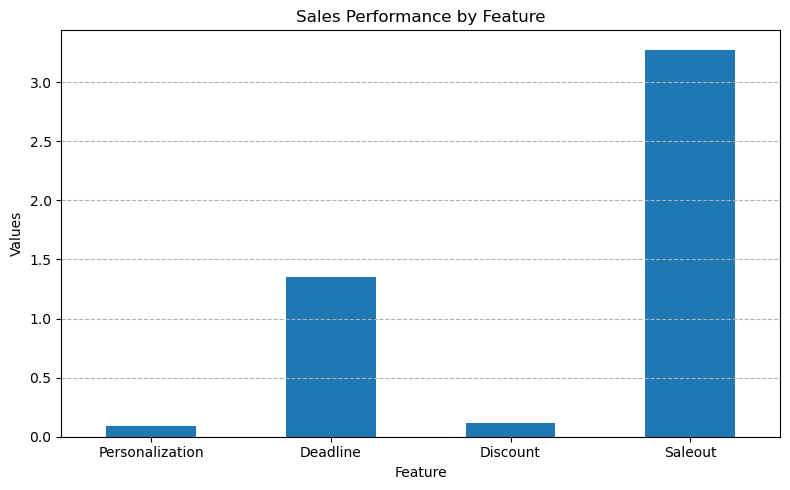

In [60]:
def getdiff(diff_df, feature):
    diff_1 = diff_df[0][(feature, 1)] - diff_df[0][(feature, 0)]
    percentage_inc = (diff_1 / diff_df[0][(feature, 0)]) * 100
    return diff_1, percentage_inc
    
personalization_diff, personalization_percent_inc = getdiff(diff, 'personalization')
deadline_diff, deadline_percent_inc = getdiff(diff, 'deadline')
discount_diff, discount_percent_inc = getdiff(diff, 'discount')
saleout_diff, saleout_percent_inc = getdiff(diff, 'saleout')

sales_performance = pd.DataFrame({'Difference': [personalization_diff, deadline_diff, discount_diff, saleout_diff], 
                                  'Percent Increase': [personalization_percent_inc,deadline_percent_inc, discount_percent_inc, saleout_percent_inc]}, 
                                  index = ['Personalization', 'Deadline', 'Discount', 'Saleout'])
display(sales_performance)

sales_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Sales Performance by Feature')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### BLAH BLAH EDIT LATER

In [61]:
channel_type = merged_df.groupby('channel_x')
channel_purchases = channel_type['is_purchased'].value_counts()
channel_clicks = channel_type['is_clicked'].value_counts()

result = pd.concat([channel_purchases, channel_clicks], axis=1, keys=['purchased', 'clicked'])
display(result)

purchased  clicked
channel_x                        
email       0  1133453.0  1102125
            1     1028.0    32356
mobile_push 0  1690477.0  1688328
            1        NaN     2149

### Checking if holidays correspond to client purchases

In [98]:
holidays_df = pd.read_csv('holidays.csv')
first_purchase_df = pd.read_csv('client_first_purchase_date.csv')

from datetime import datetime
import pytz

Creating a dataframe looking at the marketing generated sales that occured during holidays:

In [99]:
temp_df = pd.DataFrame({'date_p': merged_df['purchased_at']}).reset_index()
temp_df = temp_df.dropna(subset=['date_p'])
for i in temp_df.index:
    temp_df.loc[i, 'date_p'] = pd.to_datetime(temp_df['date_p'][i]).strftime('%Y-%m-%d')

result_df = pd.merge(holidays_df, temp_df, left_on='date', right_on='date_p', how='inner')
holiday_messages_df = result_df[['holiday', 'date_p']].value_counts().reset_index(name='count')

display(holiday_messages_df)

,holiday,date_p,count
0,Independence Day,2021-06-12,45


Creating a dataframe looking at the store sales that occured during holidays:

In [100]:
result_df = pd.merge(holidays_df, first_purchase_df, left_on='date', right_on='first_purchase_date', how='inner')
holiday_store_sales_df = result_df[['holiday', 'date']].value_counts().reset_index(name='count')
display(holiday_store_sales_df)

,holiday,date,count
0,Unity Day,2022-11-04,6416
1,Independence Day,2023-06-12,4908
2,Spring and Labor Day,2023-05-01,3831
3,Victory day,2023-05-09,3286
4,Back to School,2023-09-01,3209
5,Black Friday,2023-11-24,3004
6,International Women's Day,2022-03-08,2851
7,Fool's day,2022-04-01,2643
8,Unity Day,2023-11-04,2512
9,Cyber Monday Sale,2022-01-31,2508


Computing percentage of sales generated during holidays, with respect to the total amount of sales produced by the store.

In [102]:
fraction_messages = (holiday_store_sales_df['count'].sum() / len(first_purchase_df)) * 100
fraction_first = (holiday_messages_df['count'].sum() / merged_df['is_purchased'].sum()) * 100

print("PERCENT INCREASE IN SALES:\n")
print("Percentage of first time customer purchases that occured during a holiday:")
print(round(fraction_first,2),"%")
print("\nPercentage of marketing generated purchases that occured during a holiday:")
print(round(fraction_messages,2),"%")

PERCENT INCREASE IN SALES:

Percentage of first time customer purchases that occured during a holiday:
4.38 %

Percentage of marketing generated purchases that occured during a holiday:
3.68 %
